In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
import re

In [2]:
df = pd.read_csv('weather_data.csv')
df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      70792 non-null  int64  
 1   city      70792 non-null  object 
 2   country   70792 non-null  object 
 3   avg_temp  68245 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [7]:
bin_size = 10
bin_edges = np.arange(df['year'].min(), df['year'].max()+bin_size, bin_size)
bin_edges

array([1743, 1753, 1763, 1773, 1783, 1793, 1803, 1813, 1823, 1833, 1843,
       1853, 1863, 1873, 1883, 1893, 1903, 1913, 1923, 1933, 1943, 1953,
       1963, 1973, 1983, 1993, 2003, 2013])

In [14]:
bin_mids = bin_edges[:-1] + 5
bin_mids

array([1748, 1758, 1768, 1778, 1788, 1798, 1808, 1818, 1828, 1838, 1848,
       1858, 1868, 1878, 1888, 1898, 1908, 1918, 1928, 1938, 1948, 1958,
       1968, 1978, 1988, 1998, 2008])

In [8]:
bin_intervals = pd.cut(df['year'], bin_edges)
bin_intervals

0        (1843, 1853]
1        (1843, 1853]
2        (1843, 1853]
3        (1843, 1853]
4        (1843, 1853]
             ...     
70787    (2003, 2013]
70788    (2003, 2013]
70789    (2003, 2013]
70790    (2003, 2013]
70791    (2003, 2013]
Name: year, Length: 70792, dtype: category
Categories (27, interval[int64, right]): [(1743, 1753] < (1753, 1763] < (1763, 1773] < (1773, 1783] ... (1973, 1983] < (1983, 1993] < (1993, 2003] < (2003, 2013]]

In [9]:
df_year_i = df.groupby(bin_intervals)['avg_temp'].mean()

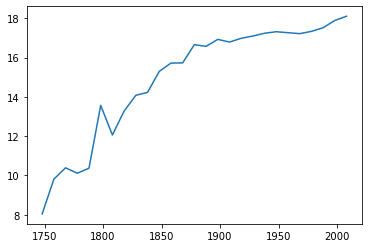

In [15]:
plt.errorbar(bin_mids, df_year_i);

In [21]:
df['city'].value_counts().index.values[:10]

array(['Birmingham', 'London', 'Santiago', 'Alexandria', 'Barcelona',
       'Kingston', 'Valencia', 'Hyderabad', 'Colombo', 'Santo Domingo'],
      dtype=object)